In [1]:
import os
import utilities as rocku
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
import timeit
from pystackreg import StackReg
from PIL import Image
import skimage as ski

In [2]:
ncore = mp.cpu_count()
ncore

48

In [3]:
# need to change
ipts="30890"
# scan_type = 'ct_scans'
# scan_type = 'radiographs'
# scan_type = 'processed_data'
scan_type = 'analysis'
####################################
##################################
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/" + scan_type
folder_list = os.listdir(scan_loc)
folder_list.sort()
folder_list

['2023_08_04_EXPT1_MELD_SCALED_ROTATION',
 '2023_08_04_EXPT1_MELD_SCALED_ROTATION_overlay',
 '2023_08_04_EXPT2_G1B_G5B_SCALED_ROTATION',
 '2023_08_04_EXPT3_G4B_G2B_SCALED_ROTATION',
 '2023_08_04_EXPT4_1B_1T_SCALED_ROTATION',
 '2023_08_05_EXPT5_G3T_G3B_SCALED_ROTATION',
 '2023_08_05_EXPT6_ALcubes_SCALED_ROTATION',
 '2023_08_05_EXPT7_G2T_G4T_SCALED_ROTATION',
 '2023_08_06_EXPT10_Silver_Behenate_SCALED_ROTATION',
 '2023_08_06_EXPT8_G4B_G2B_SCALED_ROTATION',
 '2023_08_06_EXPT9_3T_3B_SCALED_ROTATION']

In [4]:
sample_name = "2023_08_04_EXPT1_MELD_SCALED_ROTATION"
name_pattern = ["TI_ACL", "DFI_ACL", "DPC_ACL"]
ref_name = name_pattern[0]
lay_name = name_pattern[1]
reverse = False
######################
######################
name_list = [ref_name, lay_name]
scan_dir = os.path.join(scan_loc, sample_name)
fname_list = os.listdir(scan_dir)
fname_list.sort()
fname_dict = {}
for e_pa in name_list:
    _fname_list = rocku.filter_list(fname_list, e_pa)
    _fname_list.sort(reverse=reverse)
    fname_dict[e_pa] = _fname_list
fname_dict

{'TI_ACL': ['TI_ACL_0008nm.tiff',
  'TI_ACL_0053nm.tiff',
  'TI_ACL_0097nm.tiff',
  'TI_ACL_0141nm.tiff',
  'TI_ACL_0185nm.tiff',
  'TI_ACL_0230nm.tiff',
  'TI_ACL_0274nm.tiff',
  'TI_ACL_0318nm.tiff',
  'TI_ACL_0362nm.tiff',
  'TI_ACL_0407nm.tiff',
  'TI_ACL_0451nm.tiff',
  'TI_ACL_0495nm.tiff',
  'TI_ACL_0539nm.tiff',
  'TI_ACL_0584nm.tiff',
  'TI_ACL_0628nm.tiff',
  'TI_ACL_0672nm.tiff',
  'TI_ACL_0716nm.tiff',
  'TI_ACL_0761nm.tiff',
  'TI_ACL_0805nm.tiff',
  'TI_ACL_0849nm.tiff',
  'TI_ACL_0871nm.tiff'],
 'DFI_ACL': ['DFI_ACL_0008nm.tiff',
  'DFI_ACL_0053nm.tiff',
  'DFI_ACL_0097nm.tiff',
  'DFI_ACL_0141nm.tiff',
  'DFI_ACL_0185nm.tiff',
  'DFI_ACL_0230nm.tiff',
  'DFI_ACL_0274nm.tiff',
  'DFI_ACL_0318nm.tiff',
  'DFI_ACL_0362nm.tiff',
  'DFI_ACL_0407nm.tiff',
  'DFI_ACL_0451nm.tiff',
  'DFI_ACL_0495nm.tiff',
  'DFI_ACL_0539nm.tiff',
  'DFI_ACL_0584nm.tiff',
  'DFI_ACL_0628nm.tiff',
  'DFI_ACL_0672nm.tiff',
  'DFI_ACL_0716nm.tiff',
  'DFI_ACL_0761nm.tiff',
  'DFI_ACL_0805nm.tiff',

In [5]:
img_dict = {}
for e_pa in name_list:
    print("Loading {} ...".format(e_pa))
    _img_stack = rocku.read_img_stack(scan_dir, fname_dict[e_pa], flipud=False)
    img_dict[e_pa] = _img_stack.astype(np.float32)

Loading TI_ACL ...


21it [00:02,  7.59it/s]


Loading DFI_ACL ...


21it [00:02,  7.82it/s]


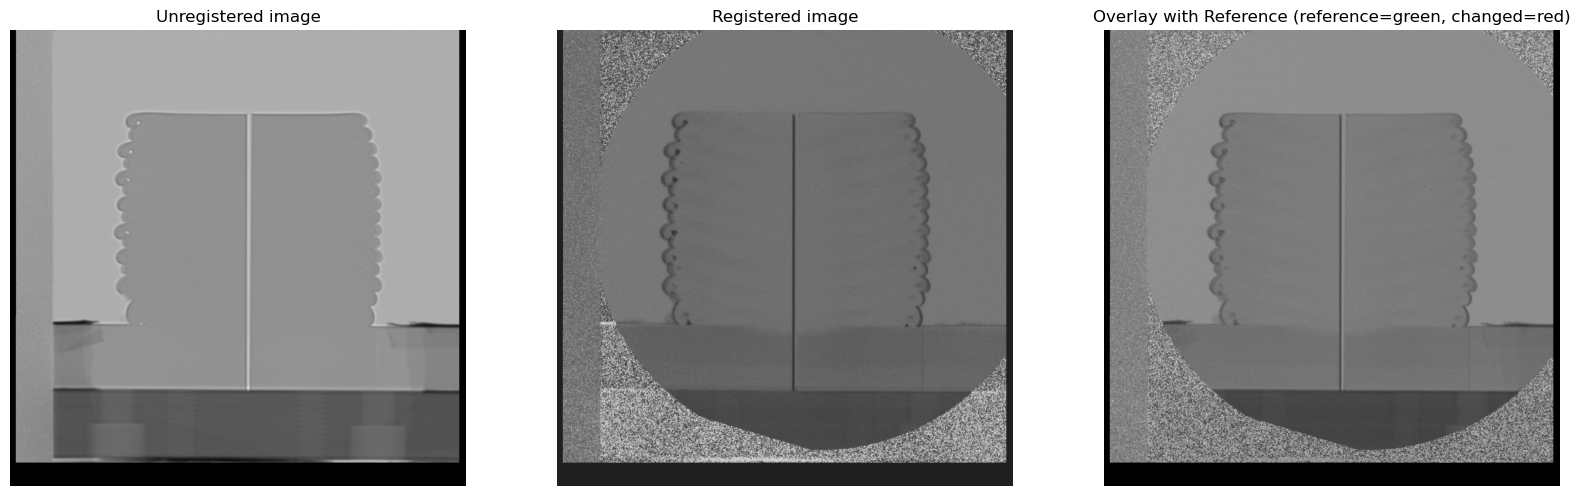

In [15]:
img_idx = -1
ref = img_dict[ref_name][img_idx]
lay = img_dict[lay_name][img_idx]
# ref = ski.filters.sobel(ref)
# ref = ski.feature.canny(ref, sigma=0.1)
# lay = ski.filters.sobel(lay)
#########################
f, ax = plt.subplots(1, 3, figsize=(20, 9))
# overlay =  rocku.composite_images([img_dict[ref_name][img_idx], img_dict[lay_name][img_idx]])
overlay =  ref + lay

# overlay =  rocku.overlay_images([ref, lay])

ax[0].imshow(ref, cmap='gray')
ax[0].set_title('Unregistered image')
ax[0].axis('off')

ax[1].imshow(lay, cmap='gray')
ax[1].set_title('Registered image')
ax[1].axis('off')

ax[2].imshow(overlay, cmap='gray')
ax[2].set_title('Overlay with Reference (reference=green, changed=red)')
ax[2].axis('off');

In [16]:
size = (img_dict[ref_name].shape[0], img_dict[ref_name].shape[1], img_dict[ref_name].shape[2])
overlay = np.empty(size, dtype=img_dict[ref_name].dtype)
for idx in range(size[0]):
#     overlay[idx] = rocku.composite_images([img_dict[ref_name][idx], img_dict[lay_name][idx]])
#     overlay[idx] = rocku.overlay_images([img_dict[ref_name][idx], img_dict[lay_name][idx]])
    overlay[idx] = img_dict[ref_name][idx] + img_dict[lay_name][idx]
#     reg_dict['overlay'][idx] = _overlay

# Save files

In [17]:
################ change save path for your own
save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/analysis/" + sample_name + "_overlay" # + '_redo'
if not os.path.exists(save_to):
    os.mkdir(save_to)
for i, ea in enumerate(fname_dict[ref_name]):
    _split = ea.split('_')[-1]
    _fname = save_to + "/overlay_" + _split
    print('Saving to {} ...'.format(_fname))
    img_pl = Image.fromarray(overlay[i])
    img_pl.save(_fname)

Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_04_EXPT1_MELD_SCALED_ROTATION_overlay/overlay_0008nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_04_EXPT1_MELD_SCALED_ROTATION_overlay/overlay_0053nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_04_EXPT1_MELD_SCALED_ROTATION_overlay/overlay_0097nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_04_EXPT1_MELD_SCALED_ROTATION_overlay/overlay_0141nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_04_EXPT1_MELD_SCALED_ROTATION_overlay/overlay_0185nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_04_EXPT1_MELD_SCALED_ROTATION_overlay/overlay_0230nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_04_EXPT1_MELD_SCALED_ROTATION_overlay/overlay_0274nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_04_EXPT1_MELD_SCALED_ROTATION_overlay/overlay_0318nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_